In [3]:
%cd vanhateren_iml

/Users/tyerxa/Desktop/VS265/Final_Project/vanhateren_iml


In [45]:
import numpy as np
import array 
import sklearn
from sklearn.feature_extraction import image
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt

patch_size  = 8
p_per_image = 200
n_images    = 9

In [67]:
# load a set of 9 images 
images  = []
patches = []
for i in range(n_images):
    filename  = 'imk0000'
    filename += str(i + 1)
    filename += '.iml'
    
    with open(filename, 'rb') as handle:
        s = handle.read()
    arr   = array.array('H', s)
    arr.byteswap()
    img   = np.array(arr, dtype='uint16').reshape(1024, 1536)
    
    # set image to zero mean and unit variance
    img   = (img - np.mean(img)) / np.std(img)

    # extract image patches, set patches to zero mean
    patch = image.extract_patches_2d(img, [patch_size, patch_size], max_patches = p_per_image)
    for i in range(patch.shape[0]):
        patch[i] = patch[i] - np.mean(patch[i])

    
    images.append(img)
    patches.append(patch)
 

images  = np.array(images)
patches = np.array(patches)

# reshape for convenience 
patches = np.reshape(patches, [n_images*p_per_image, patch_size * patch_size])



/Users/tyerxa/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/image.py:287: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  indexing_strides = arr[slices].strides


/Users/tyerxa/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


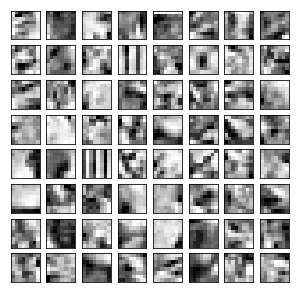

In [73]:
# Use Fast ICA to find independent components of image patches
ica = FastICA(n_components = 64)
ica.fit_transform(patches)
W   = ica.mixing_

W   = np.reshape(W.T, [64, 8, 8])

fig, axs = plt.subplots(8, 8)
fig.set_size_inches(5,5)

for i in range(8):
    for j in range(8):
        ax = axs[i, j]
        ax.imshow(W[(i-1)*8 + j], cmap = 'Greys')
        ax.tick_params(
          axis="both",
          bottom="off",
          top="off",
          left="off",
          right="off")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
